In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("Imputed_dataset.csv",parse_dates=['datetime_local', 'datetime_utc'])
df.head()

,state,district,location_id,location_name,datetime_utc,datetime_local,latitude,longitude,pm25,pm10,...,pm25_scaled,pm10_scaled,no2_scaled,co_scaled,so2_scaled,o3_scaled,temperature_scaled,humidity_scaled,wind_speed_scaled,wind_direction_scaled
0,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 15:00:00+00:00,2025-11-11 20:30:00,28.563262,77.186937,237.0,390.0,...,0.009259,0.371213,0.137582,1.255464,0.738325,-0.005949,-0.229326,0.256680,-0.199909,0.894188
1,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 15:15:00+00:00,2025-11-11 20:45:00,28.563262,77.186937,234.0,337.0,...,0.008766,0.290353,0.143616,1.268665,0.759974,-0.005949,-0.207712,0.216530,-0.199909,0.332453
2,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 15:30:00+00:00,2025-11-11 21:00:00,28.563262,77.186937,234.0,337.0,...,0.008766,0.290353,0.142822,1.493083,0.756366,-0.005949,-0.207712,0.216530,-0.199909,0.205268
3,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 16:00:00+00:00,2025-11-11 21:30:00,28.563262,77.186937,234.0,337.0,...,0.008766,0.290353,0.111383,1.453479,0.846569,-0.005949,-0.294165,0.336981,-0.199909,0.300657
4,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 16:30:00+00:00,2025-11-11 22:00:00,28.563262,77.186937,258.0,366.0,...,0.012709,0.334598,0.100586,1.493083,0.861002,-0.005949,-0.380619,0.457433,-0.199909,0.194669


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)


Shape: (77994, 58)

Columns:
 Index(['state', 'district', 'location_id', 'location_name', 'datetime_utc',
       'datetime_local', 'latitude', 'longitude', 'pm25', 'pm10', 'no2', 'co',
       'so2', 'o3', 'temperature', 'humidity', 'wind_speed', 'wind_direction',
       'Roads_count', 'Industrial_zones_count', 'Dump_sites_count',
       'Agricultural_fields_count', 'Query_status', 'Urban_density_score',
       'Industrial_presence', 'Pollution_source_risk', 'Green_area_ratio',
       'dist_nearest_road_m', 'dist_nearest_industry_m', 'dist_nearest_dump_m',
       'dist_nearest_agriculture_m', 'hour', 'is_peak_hour', 'day_of_week',
       'is_weekend', 'month', 'season', 'season_code', 'pm25_normalized',
       'pm10_normalized', 'no2_normalized', 'co_normalized', 'so2_normalized',
       'o3_normalized', 'temperature_normalized', 'humidity_normalized',
       'wind_speed_normalized', 'wind_direction_normalized', 'pm25_scaled',
       'pm10_scaled', 'no2_scaled', 'co_scaled', 'so2_scaled

In [6]:
missing = df.isna().sum()

if missing.sum() == 0:
    print("✅ No missing values in the dataset")
else:
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage (%)': missing_pct
    }).sort_values(by='Missing_Count', ascending=False)
    display(missing_df[missing_df['Missing_Count'] > 0])


✅ No missing values in the dataset


In [7]:
df.describe()


,location_id,datetime_local,latitude,longitude,pm25,pm10,no2,co,so2,o3,...,pm25_scaled,pm10_scaled,no2_scaled,co_scaled,so2_scaled,o3_scaled,temperature_scaled,humidity_scaled,wind_speed_scaled,wind_direction_scaled
count,7.799400e+04,77994,77994.000000,77994.000000,77994.000000,77994.000000,77994.000000,77994.000000,77994.000000,7.799400e+04,...,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04,7.799400e+04
mean,7.411306e+05,2025-11-26 22:01:01.112393472,20.750412,79.569141,179.911964,148.490877,47.137626,0.791136,15.855294,3.092766e+22,...,2.365966e-11,-2.623850e-09,6.411486e-11,4.333037e-09,-3.150086e-09,-2.471172e-11,1.160141e-09,5.599522e-09,-2.048155e-10,-3.944169e-09
min,1.700000e+01,2025-11-11 20:30:00,8.514909,72.591912,-9999.000000,-999.900000,-63.600000,-6.760000,-17.020000,-7.087000e+02,...,-1.672343e+00,-1.749301e+00,-1.755356e-01,-9.965428e+00,-1.181924e+00,-5.949123e-03,-7.826406e+00,-3.597777e+00,-2.543303e-01,-1.753808e+00
25%,5.646000e+03,2025-11-19 13:18:45,16.515083,76.240850,29.000000,57.310000,8.560000,0.390000,5.300000,7.000000e+00,...,-2.481803e-02,-1.343903e-01,-5.962492e-02,-4.870749e-01,-3.638700e-01,-5.949123e-03,-2.725523e-01,-3.455786e-01,-1.999094e-01,-7.197656e-01
50%,8.914000e+03,2025-11-27 03:15:00,22.368195,78.193251,45.100000,86.127586,15.700000,0.630000,10.620000,2.328000e+01,...,-2.207286e-02,-9.301440e-02,-4.914533e-02,-1.966518e-01,-1.763371e-01,-5.949123e-03,8.190614e-02,9.768397e-02,-1.821393e-01,1.809377e-02
75%,2.707210e+05,2025-12-04 05:30:00,25.265194,82.137370,74.000000,141.000000,25.700000,0.940000,18.967500,3.550000e+01,...,-1.755877e-02,-2.136943e-02,-3.460092e-02,1.729776e-01,9.607706e-02,-5.949123e-03,4.947204e-01,6.481485e-01,-1.499310e-01,7.034099e-01
max,3.409391e+06,2025-12-11 19:45:00,30.379589,93.679645,850191.250000,17026.000000,26493.600000,9.710000,1371.400000,1.000168e+27,...,1.396424e+02,2.575209e+01,4.199244e+01,1.177670e+01,4.891415e+01,1.923825e+02,7.455288e+00,2.797008e+00,7.301290e+00,2.113045e+00
std,1.358678e+06,NaN,6.080009,5.281658,6087.135088,656.523578,630.131896,0.779906,28.003772,5.198726e+24,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00


In [8]:
invalid_values = {
    'pm25': [-9999],
    'pm10': [-999.9],
    'no2': lambda x: x < 0,
    'co': lambda x: x < 0,
    'so2': lambda x: x < 0,
    'o3': lambda x: x < 0
}

for col, rule in invalid_values.items():
    if callable(rule):
        df.loc[rule(df[col]), col] = np.nan
    else:
        df[col] = df[col].replace(rule, np.nan)


In [9]:
df.isna().sum().sort_values(ascending=False)


co                            191
o3                             48
no2                            37
so2                            34
pm25                           13
pm10                            2
district                        0
state                           0
location_id                     0
location_name                   0
latitude                        0
longitude                       0
datetime_utc                    0
datetime_local                  0
temperature                     0
humidity                        0
wind_speed                      0
wind_direction                  0
Roads_count                     0
Industrial_zones_count          0
Dump_sites_count                0
Agricultural_fields_count       0
Query_status                    0
Urban_density_score             0
Industrial_presence             0
Pollution_source_risk           0
Green_area_ratio                0
dist_nearest_road_m             0
dist_nearest_industry_m         0
dist_nearest_d

In [10]:
df['datetime_local'] = pd.to_datetime(df['datetime_local'])


In [12]:
df = df.sort_values('datetime_local').set_index('datetime_local')
pollutant_cols = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']

df[pollutant_cols] = (
    df[pollutant_cols]
    .interpolate(method='time', limit_direction='both')
)


In [13]:
df[pollutant_cols].isna().sum()


pm25    0
pm10    0
no2     0
co      0
so2     0
o3      0
dtype: int64

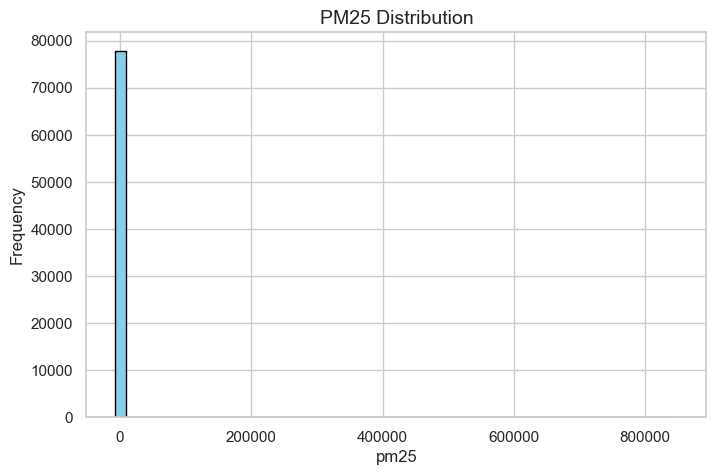

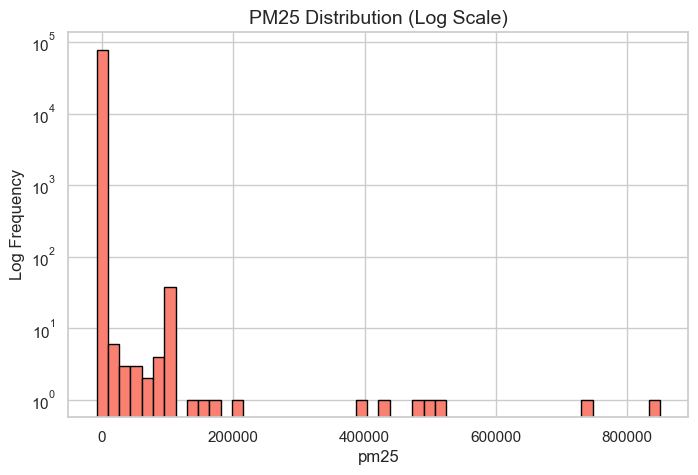

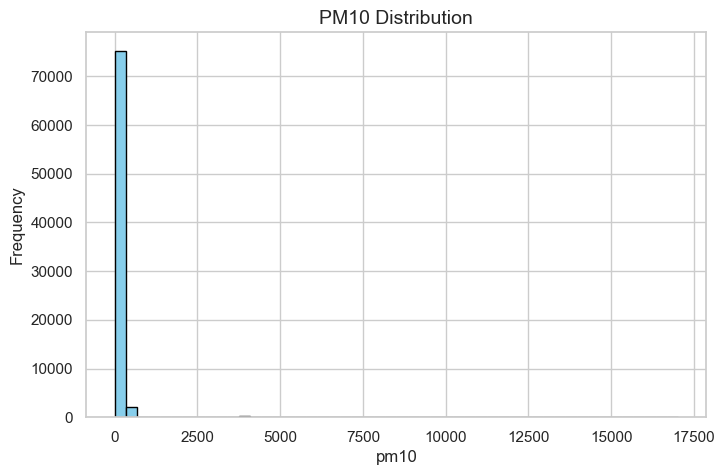

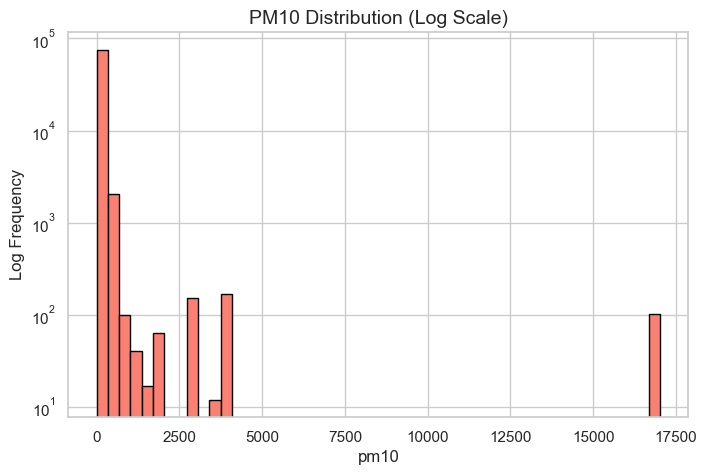

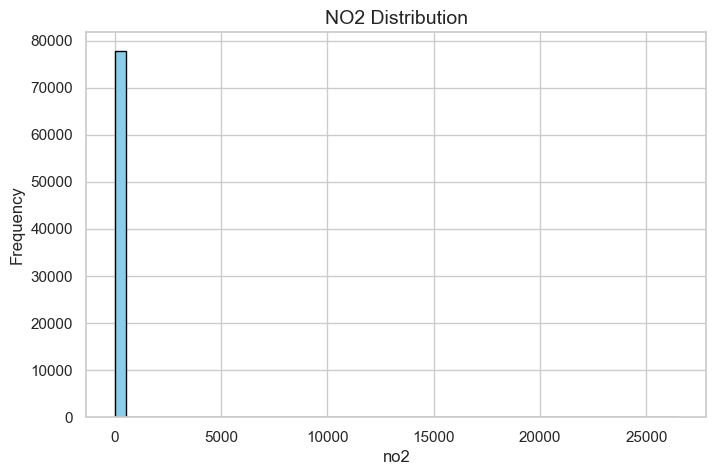

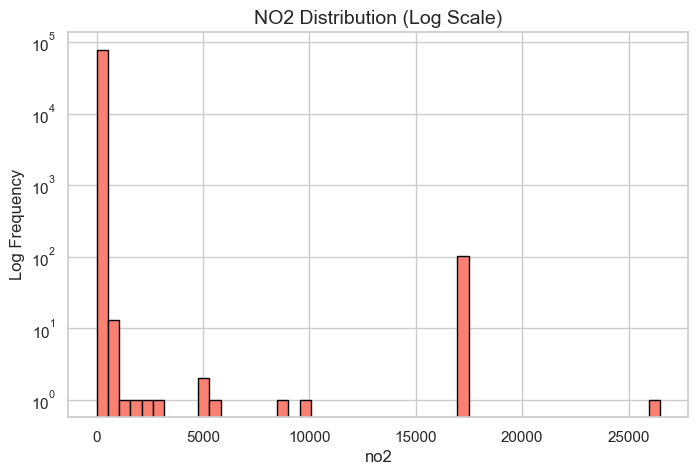

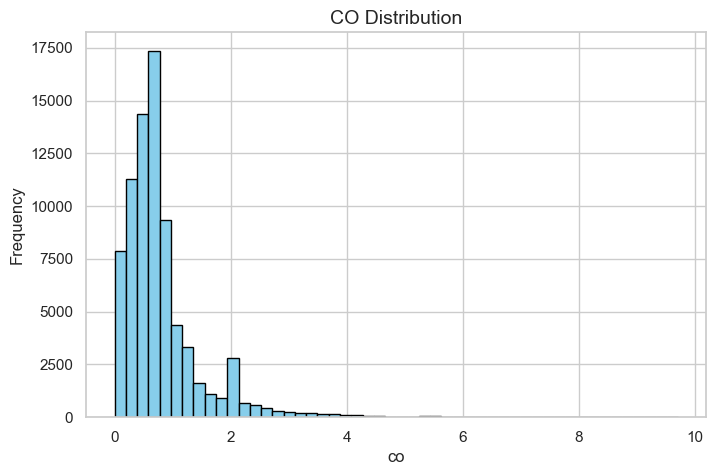

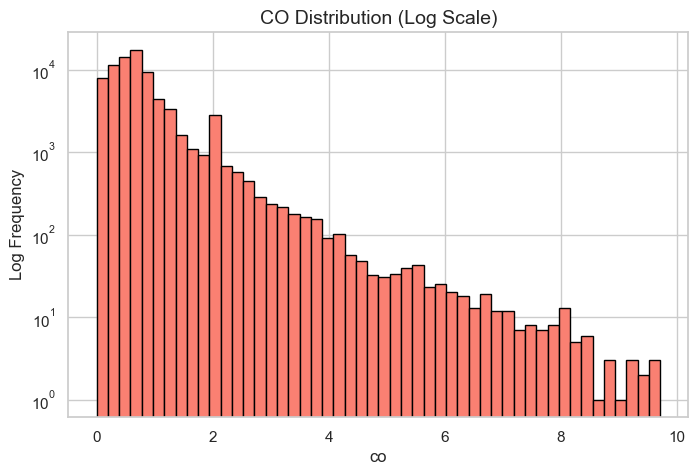

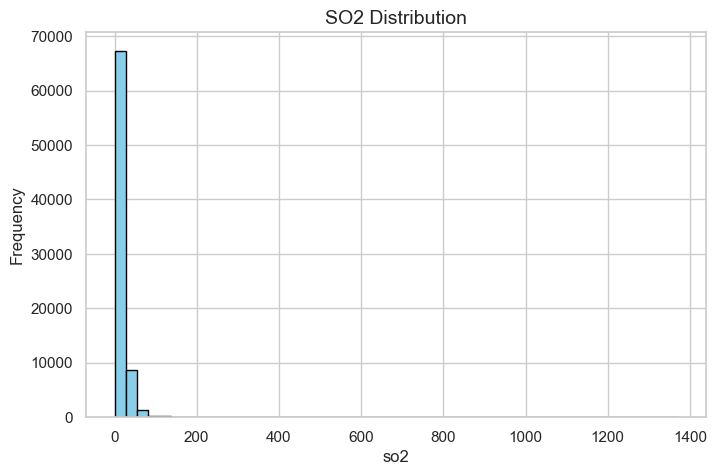

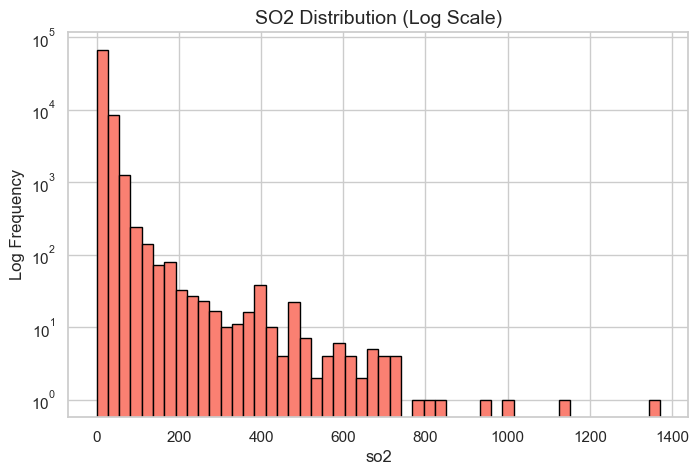

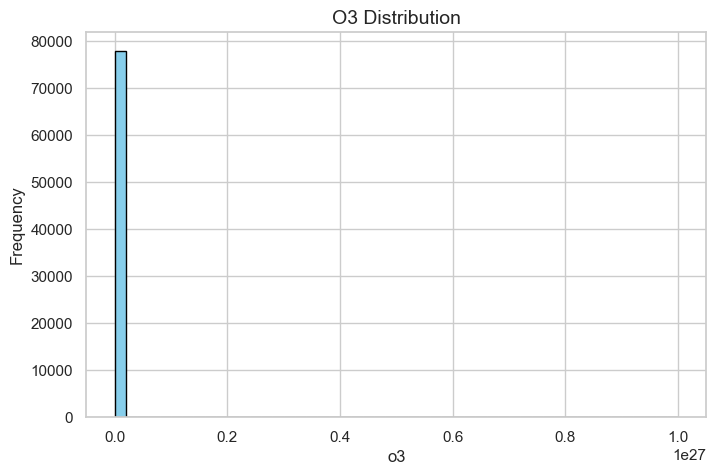

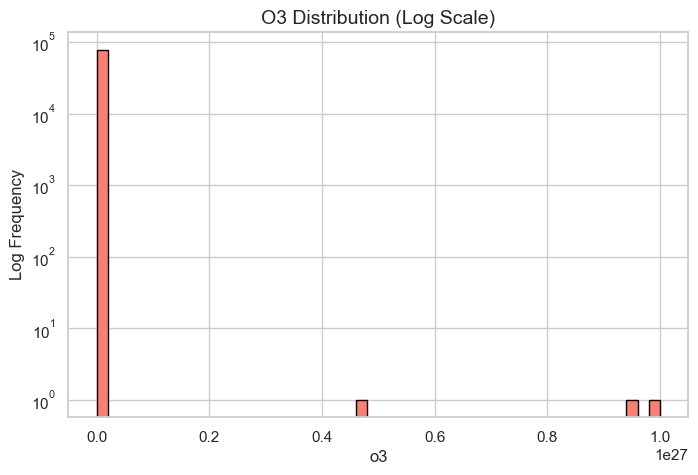

In [14]:
import matplotlib.pyplot as plt

pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']

for col in pollutants:
    # Standard histogram
    plt.figure(figsize=(8,5))
    df[col].dropna().hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{col.upper()} Distribution", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()
    
    # Log-scale histogram to visualize extreme values
    plt.figure(figsize=(8,5))
    plt.hist(df[col].dropna(), bins=50, color='salmon', edgecolor='black')
    plt.yscale('log')
    plt.title(f"{col.upper()} Distribution (Log Scale)", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Log Frequency", fontsize=12)
    plt.show()


In [16]:
#Handling outliers using IQR-based outlier capping
import numpy as np

pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']

for col in pollutants:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Set lower bound to max(Q1 - 1.5*IQR, 0)
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values outside bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    print(f"{col.upper()} - Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")



PM25 - Lower bound: 0.00, Upper bound: 141.50
PM10 - Lower bound: 0.00, Upper bound: 266.53
NO2 - Lower bound: 0.00, Upper bound: 51.39
CO - Lower bound: 0.00, Upper bound: 1.76
SO2 - Lower bound: 0.00, Upper bound: 39.50
O3 - Lower bound: 0.00, Upper bound: 78.36


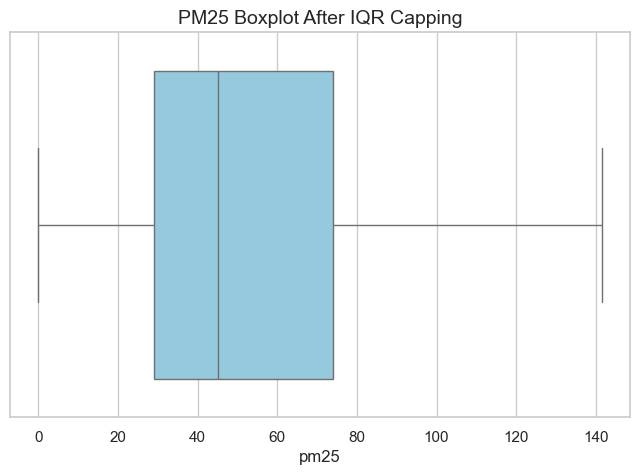

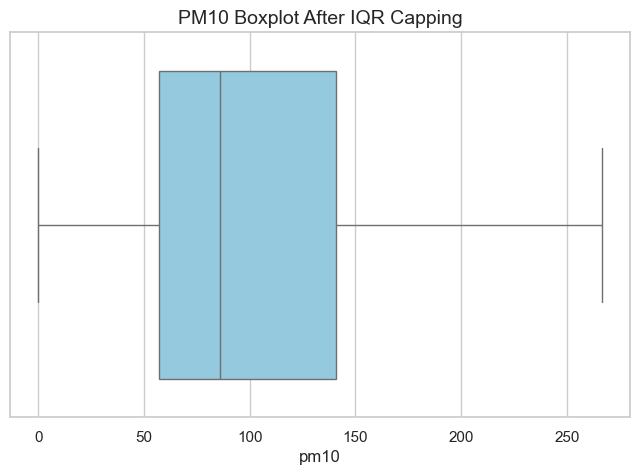

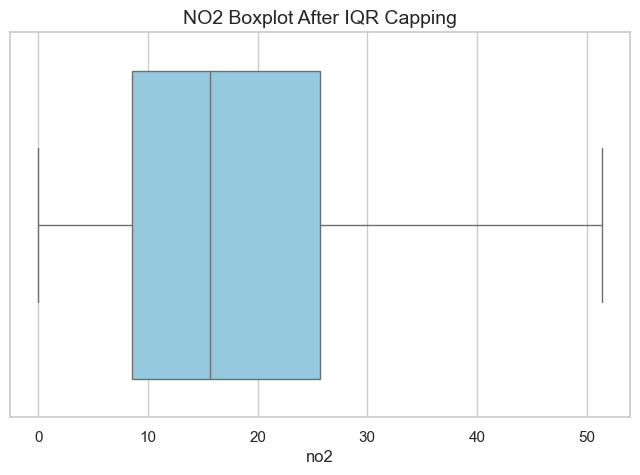

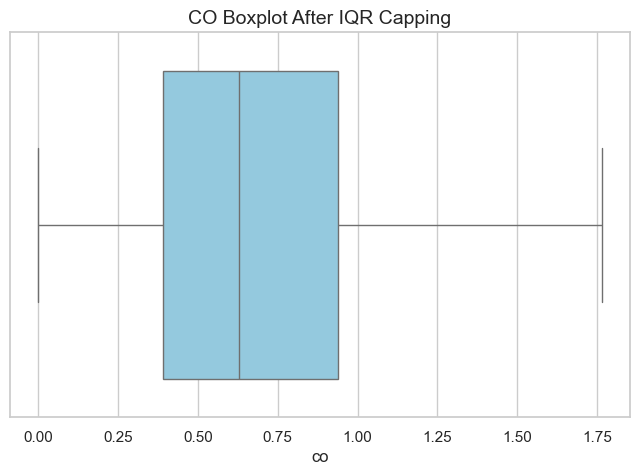

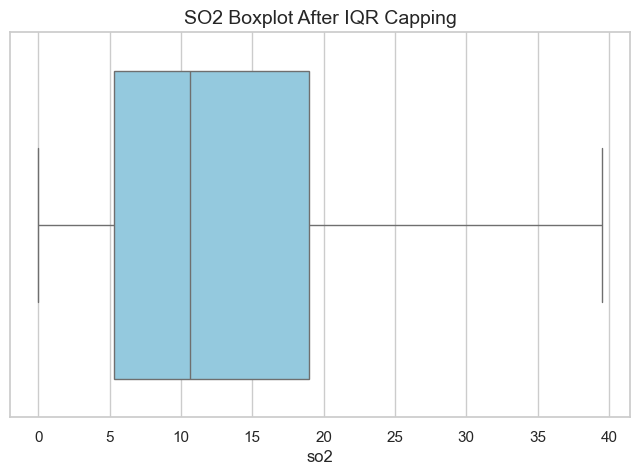

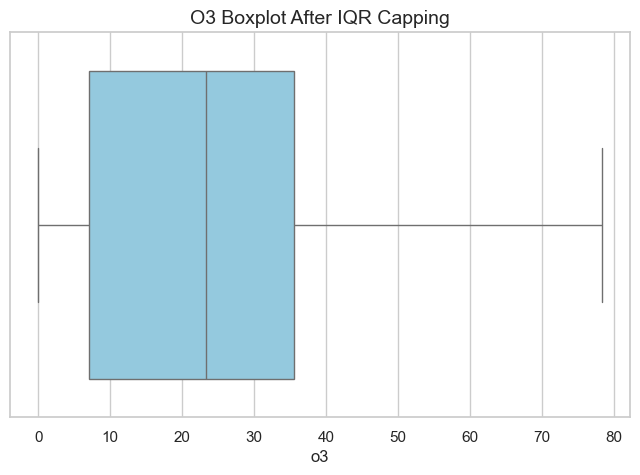

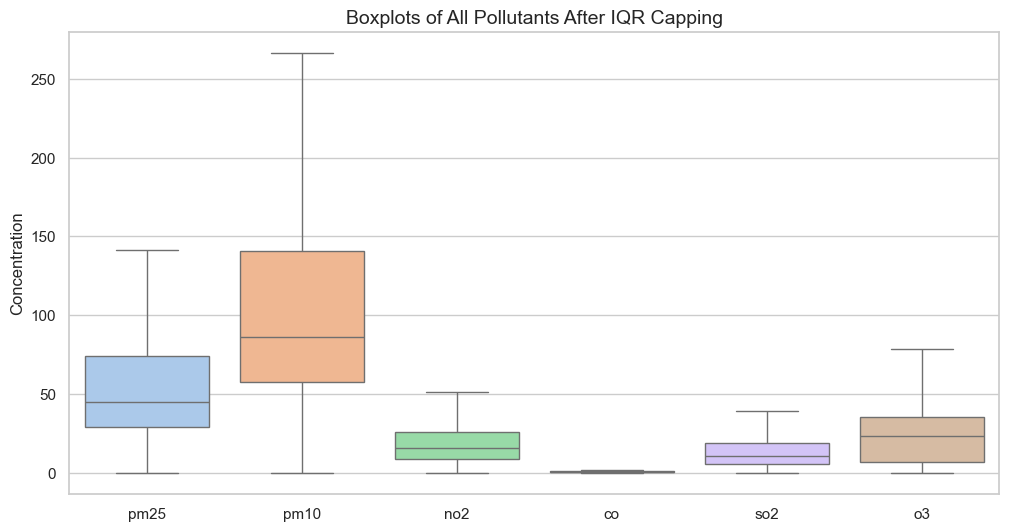

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']

# Individual boxplots for each pollutant
for col in pollutants:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col].dropna(), color='skyblue')
    plt.title(f"{col.upper()} Boxplot After IQR Capping", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()

# All pollutants in one combined vertical boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[pollutants], palette='pastel')
plt.title("Boxplots of All Pollutants After IQR Capping", fontsize=14)
plt.ylabel("Concentration", fontsize=12)
plt.show()


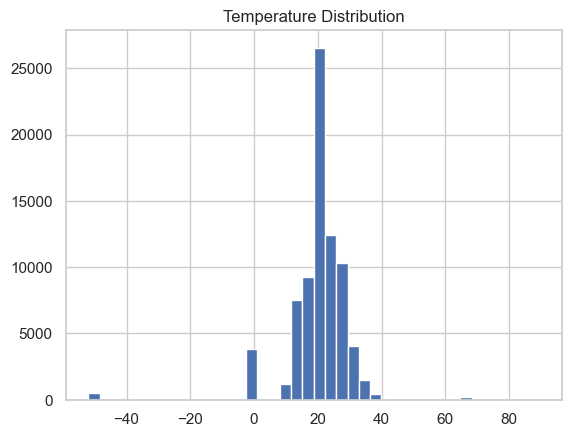

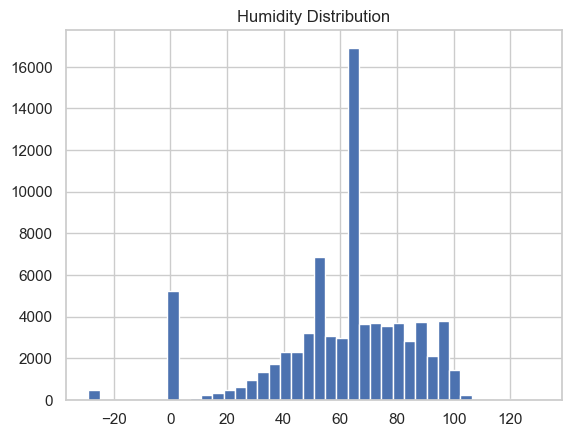

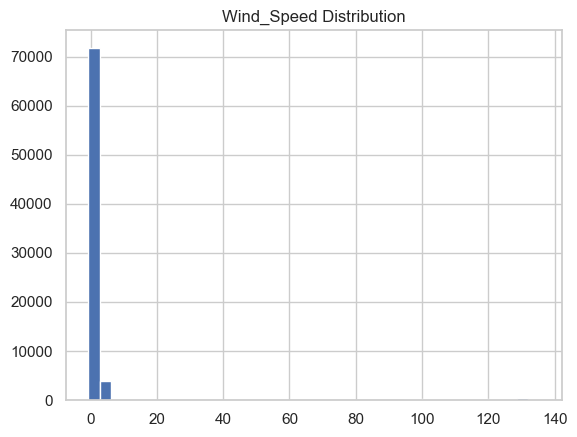

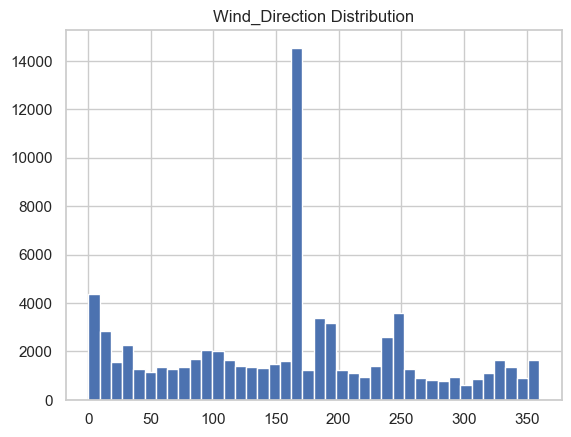

In [18]:
weather = ['temperature','humidity','wind_speed','wind_direction']

for col in weather:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"{col.title()} Distribution")
    plt.show()


In [20]:
import pandas as pd
import numpy as np

weather = ['temperature', 'humidity', 'wind_speed', 'wind_direction']

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col.upper()} - Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
    return df

for col in ['temperature', 'humidity', 'wind_speed']:
    df = remove_outliers_iqr(df, col)

# Wind direction: keep values 0–360
df['wind_direction'] = np.where((df['wind_direction'] < 0) | (df['wind_direction'] > 360), np.nan, df['wind_direction'])

# Fill NaNs with median
for col in weather:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)  # safer assignment

print("Outlier handling complete.")


TEMPERATURE - Lower bound: 10.65, Upper bound: 33.449999999999996
HUMIDITY - Lower bound: 19.43500000000001, Upper bound: 110.99499999999999
WIND_SPEED - Lower bound: -0.6450000000000002, Upper bound: 1.8750000000000002
Outlier handling complete.


In [21]:
# Cap humidity at 100%
df['humidity'] = df['humidity'].clip(upper=100)


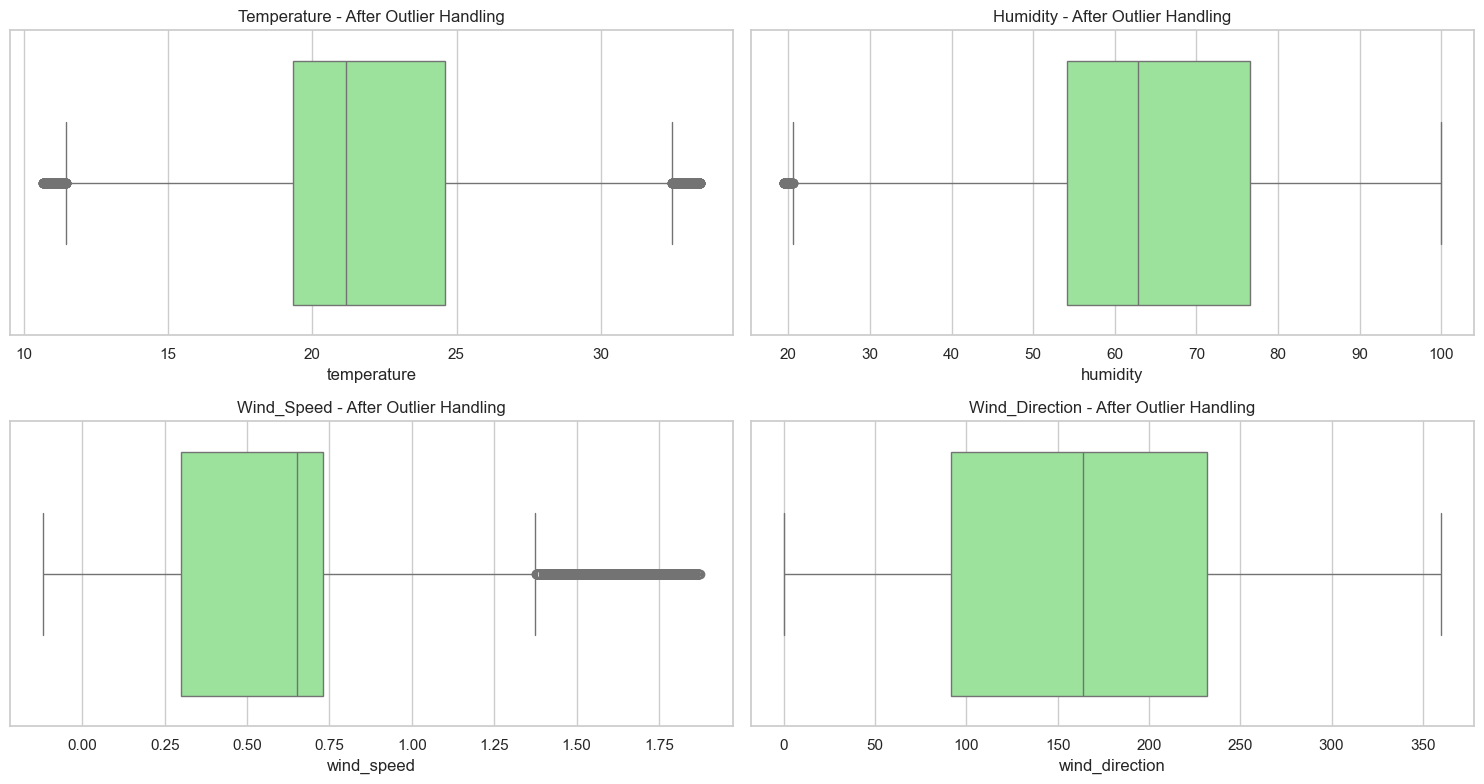

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of weather features
weather = ['temperature', 'humidity', 'wind_speed', 'wind_direction']

plt.figure(figsize=(15,8))
for i, col in enumerate(weather, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col.title()} - After Outlier Handling")

plt.tight_layout()
plt.show()



In [26]:
df['datetime_local'] = df.index


In [27]:
df[['datetime_local']].describe()


,datetime_local
count,77994
mean,2025-11-26 22:01:01.112393472
min,2025-11-11 20:30:00
25%,2025-11-19 13:18:45
50%,2025-11-27 03:15:00
75%,2025-12-04 05:30:00
max,2025-12-11 19:45:00


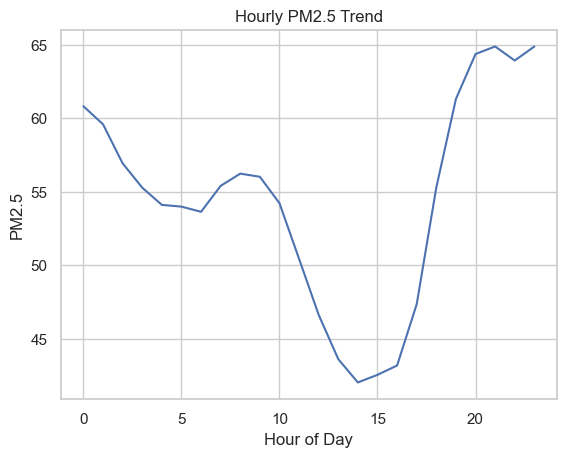

In [28]:
df['hour'] = df['datetime_local'].dt.hour

df.groupby('hour')['pm25'].mean().plot(
    title="Hourly PM2.5 Trend",
    xlabel="Hour of Day",
    ylabel="PM2.5"
)
plt.show()


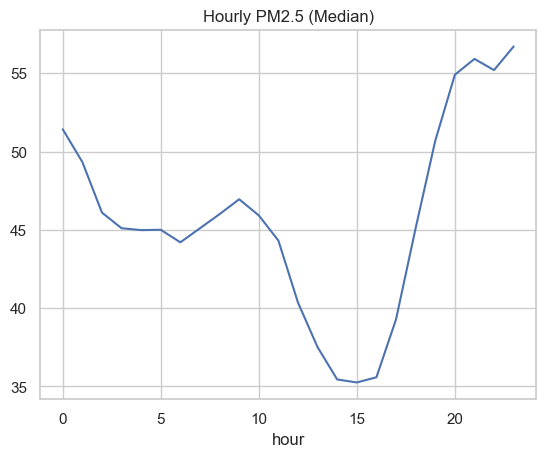

In [37]:
df.groupby('hour')['pm25'].median().plot(title="Hourly PM2.5 (Median)")
plt.show()


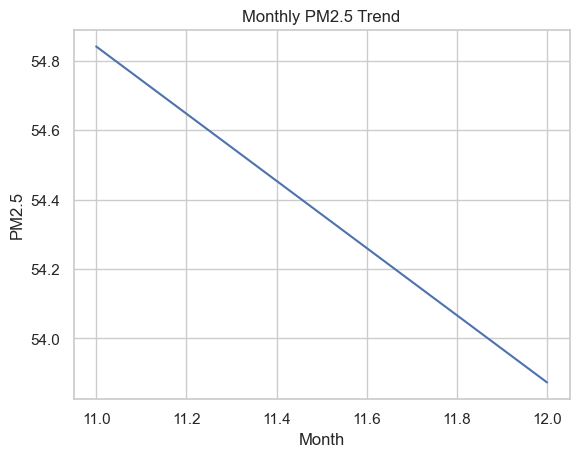

In [44]:
df['month'] = df['datetime_local'].dt.month

df.groupby('month')['pm25'].mean().plot(
    title="Monthly PM2.5 Trend",
    xlabel="Month",
    ylabel="PM2.5"
)
plt.show()


In [38]:
df['month'].value_counts().sort_index()


month
11    49689
12    28305
Name: count, dtype: int64

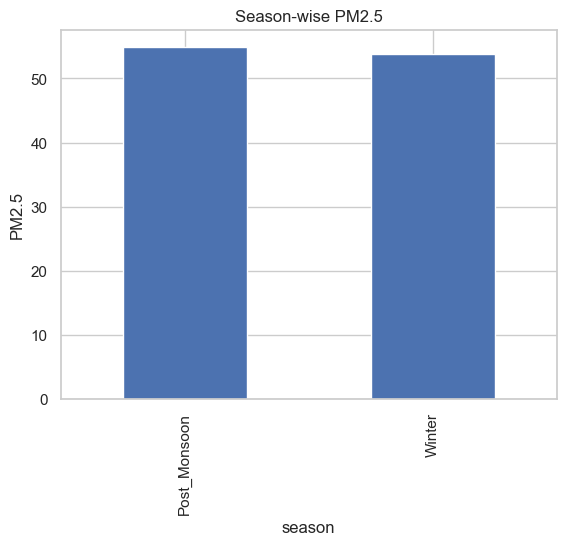

In [45]:
df.groupby('season')['pm25'].mean().plot(
    kind='bar',
    title='Season-wise PM2.5',
    ylabel='PM2.5'
)
plt.show()


In [43]:
df['season'].value_counts()


season
Post_Monsoon    49689
Winter          28305
Name: count, dtype: int64

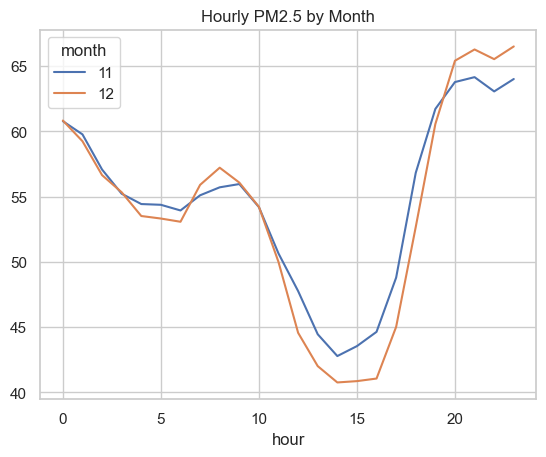

In [40]:
df.groupby(['month','hour'])['pm25'].mean().unstack().T.plot(
    title='Hourly PM2.5 by Month'
)
plt.show()


In [42]:
df[['pm25','temperature','humidity','wind_speed']].corr()


,pm25,temperature,humidity,wind_speed
pm25,1.000000,-0.279026,0.069454,-0.041206
temperature,-0.279026,1.000000,-0.308521,0.243616
humidity,0.069454,-0.308521,1.000000,-0.037656
wind_speed,-0.041206,0.243616,-0.037656,1.000000


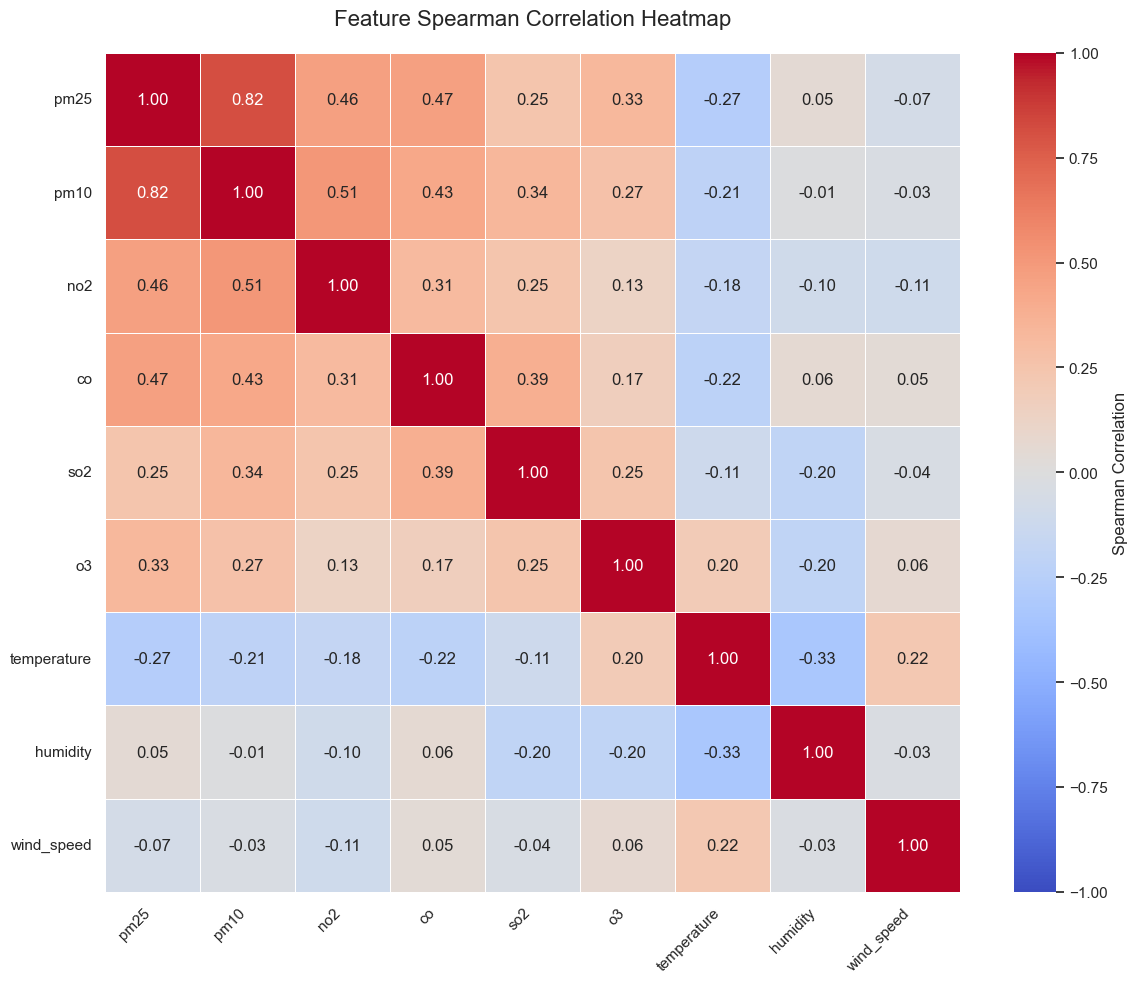

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Select relevant features
# -----------------------------
features = ['pm25','pm10','no2','co','so2','o3','temperature','humidity','wind_speed']

# -----------------------------
# Step 2: Compute Spearman correlation
# -----------------------------
# Spearman captures monotonic relationships and is robust to skewed distributions
corr_spearman = df[features].corr(method='spearman')

# -----------------------------
# Step 3: Plot polished heatmap
# -----------------------------
plt.figure(figsize=(12,10))  # larger figure for clarity
sns.heatmap(
    corr_spearman,
    annot=True,         # show correlation values
    fmt=".2f",          # 2 decimal places
    cmap="coolwarm",    # nice color gradient
    vmin=-1, vmax=1,    # consistent color scale
    linewidths=0.5,     # separates cells
    cbar_kws={'label': 'Spearman Correlation'}
)
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels
plt.yticks(rotation=0)               # y-axis labels horizontal
plt.title("Feature Spearman Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [48]:

print("""
We used Spearman correlation instead of Pearson correlation because:
1. Air pollution data (PM2.5, PM10, gases) is often skewed and not normally distributed.
2. Spearman correlation measures monotonic relationships, not just linear relationships.
3. It is more robust to outliers, which are common in environmental datasets.
4. This allows us to capture the true trend between variables like PM2.5 and temperature, or PM2.5 and wind speed, even if the relationship is non-linear.
""")



We used Spearman correlation instead of Pearson correlation because:
1. Air pollution data (PM2.5, PM10, gases) is often skewed and not normally distributed.
2. Spearman correlation measures monotonic relationships, not just linear relationships.
3. It is more robust to outliers, which are common in environmental datasets.
4. This allows us to capture the true trend between variables like PM2.5 and temperature, or PM2.5 and wind speed, even if the relationship is non-linear.



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [55]:
primary_pollutants = ['pm25', 'pm10', 'no2']
secondary_pollutants = ['co', 'so2']


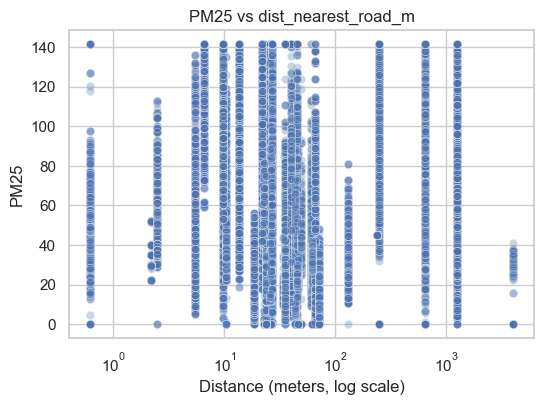

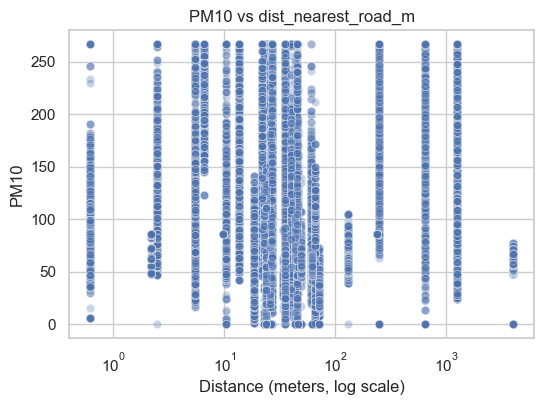

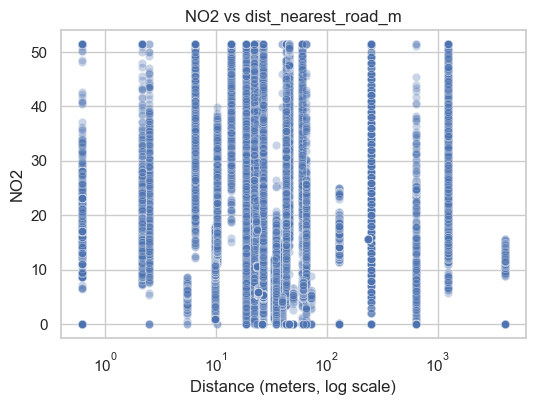

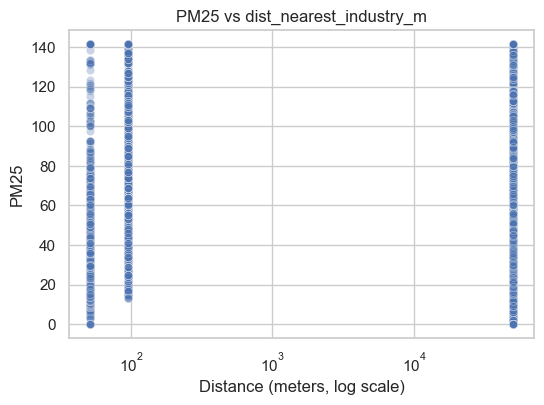

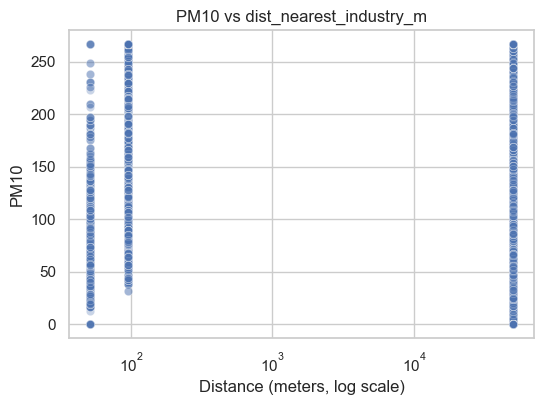

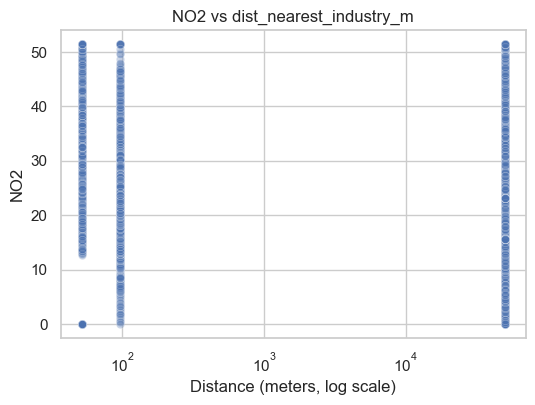

In [56]:
for dist_col in continuous_distance_features:
    for pol in primary_pollutants:
        plt.figure(figsize=(6,4))
        sns.scatterplot(
            x=dist_col,
            y=pol,
            data=df,
            alpha=0.3
        )
        plt.xscale('log')
        plt.title(f"{pol.upper()} vs {dist_col}")
        plt.xlabel("Distance (meters, log scale)")
        plt.ylabel(pol.upper())
        plt.show()


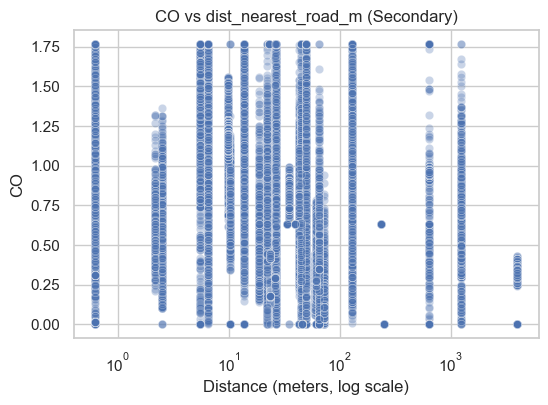

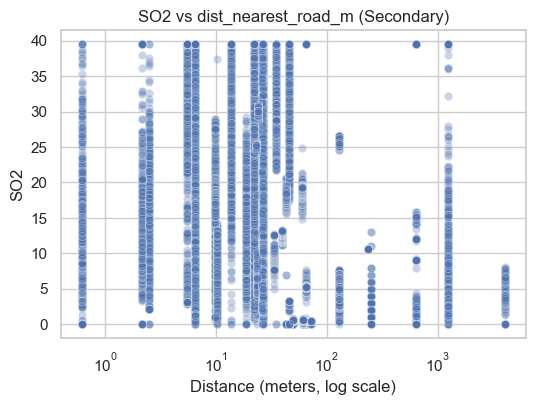

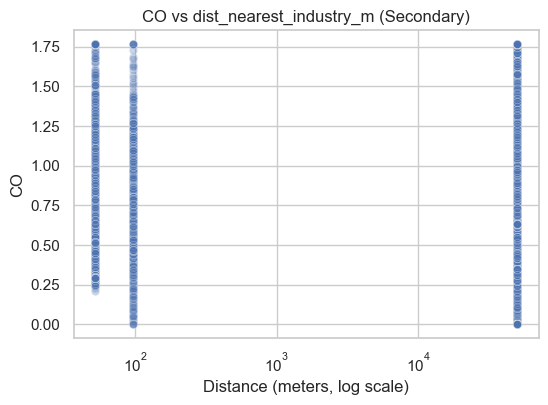

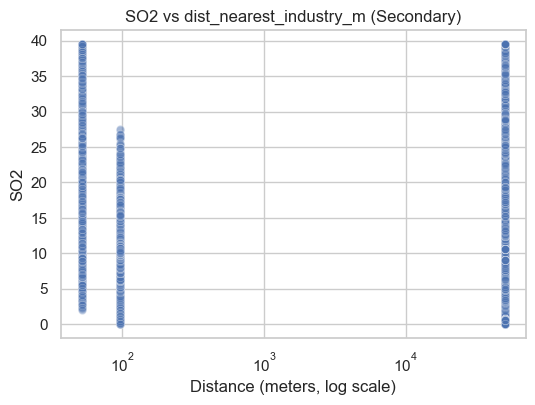

In [57]:
for dist_col in continuous_distance_features:
    for pol in secondary_pollutants:
        plt.figure(figsize=(6,4))
        sns.scatterplot(
            x=dist_col,
            y=pol,
            data=df,
            alpha=0.3
        )
        plt.xscale('log')
        plt.title(f"{pol.upper()} vs {dist_col} (Secondary)")
        plt.xlabel("Distance (meters, log scale)")
        plt.ylabel(pol.upper())
        plt.show()


In [58]:
print(
"Ozone (O3) is a secondary pollutant formed through photochemical reactions. "
"Its concentration is influenced more by sunlight, temperature, and NOx/VOCs "
"than direct proximity to emission sources. Hence, distance-based scatter plots "
"are not suitable for O3 analysis."
)


Ozone (O3) is a secondary pollutant formed through photochemical reactions. Its concentration is influenced more by sunlight, temperature, and NOx/VOCs than direct proximity to emission sources. Hence, distance-based scatter plots are not suitable for O3 analysis.


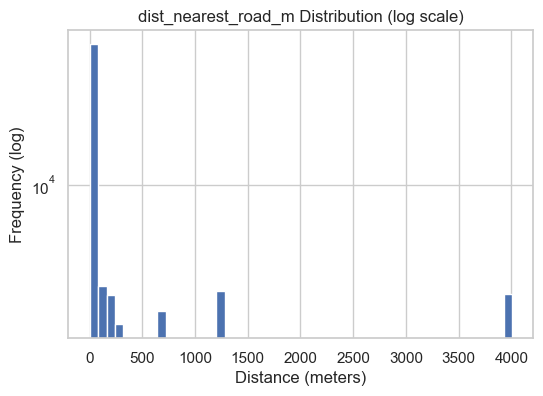

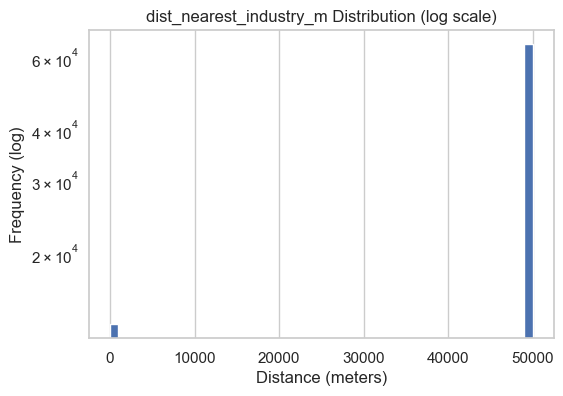

In [59]:
continuous_distance_features = [
    'dist_nearest_road_m',
    'dist_nearest_industry_m'
]

for col in continuous_distance_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=50, log=True)
    plt.title(f"{col} Distribution (log scale)")
    plt.xlabel("Distance (meters)")
    plt.ylabel("Frequency (log)")
    plt.show()

In [60]:
constant_features = [
    'dist_nearest_dump_m',
    'dist_nearest_agriculture_m'
]

for col in constant_features:
    print(f"\n{col}")
    print("Unique values:", df[col].unique())



dist_nearest_dump_m
Unique values: [10000]

dist_nearest_agriculture_m
Unique values: [10000]


In [61]:
df['near_dump'] = (df['dist_nearest_dump_m'] < 5000).astype(int)
df['near_agriculture'] = (df['dist_nearest_agriculture_m'] < 5000).astype(int)


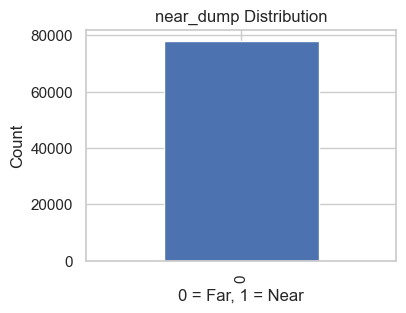

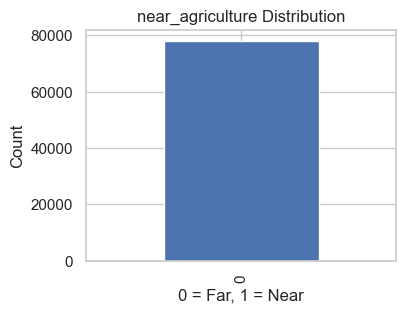

In [62]:
binary_features = ['near_dump', 'near_agriculture']

for col in binary_features:
    plt.figure(figsize=(4,3))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Distribution")
    plt.xlabel("0 = Far, 1 = Near")
    plt.ylabel("Count")
    plt.show()


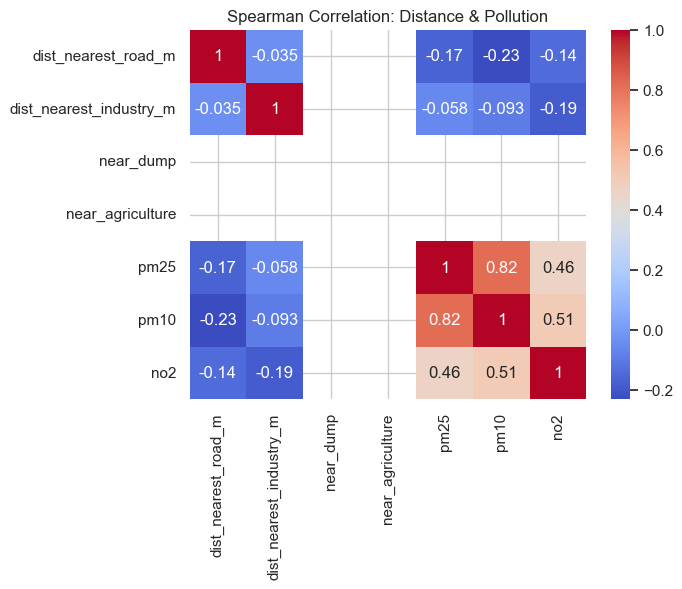

In [63]:
features_for_corr = [
    'dist_nearest_road_m',
    'dist_nearest_industry_m',
    'near_dump',
    'near_agriculture',
    'pm25', 'pm10', 'no2'
]

sns.heatmap(
    df[features_for_corr].corr(method='spearman'),
    annot=True,
    cmap='coolwarm'
)
plt.title("Spearman Correlation: Distance & Pollution")
plt.show()


In [64]:
print("""
Why Spearman Correlation was used:

1. Distance-based spatial variables are highly skewed and non-normally distributed.
2. Pollution–distance relationships are often monotonic but not strictly linear.
3. Spearman correlation is robust to outliers and non-normal data.
4. Pearson correlation assumes linearity and normality, which are violated here.

Therefore, Spearman correlation is more suitable for analyzing 
spatial proximity and air pollution relationships in this dataset.
""")



Why Spearman Correlation was used:

1. Distance-based spatial variables are highly skewed and non-normally distributed.
2. Pollution–distance relationships are often monotonic but not strictly linear.
3. Spearman correlation is robust to outliers and non-normal data.
4. Pearson correlation assumes linearity and normality, which are violated here.

Therefore, Spearman correlation is more suitable for analyzing 
spatial proximity and air pollution relationships in this dataset.



In [33]:
df.groupby('district')['pm25'].mean() \
  .sort_values(ascending=False) \
  .head(10)


district
Faridabad        135.619883
Bhopal           107.569038
Indore            90.828629
Jabalpur          87.017795
Ambala            85.966790
Gwalior           84.527901
Vadodara          82.354756
Visakhapatnam     81.057292
Panipat           80.768593
Patna             72.810873
Name: pm25, dtype: float64

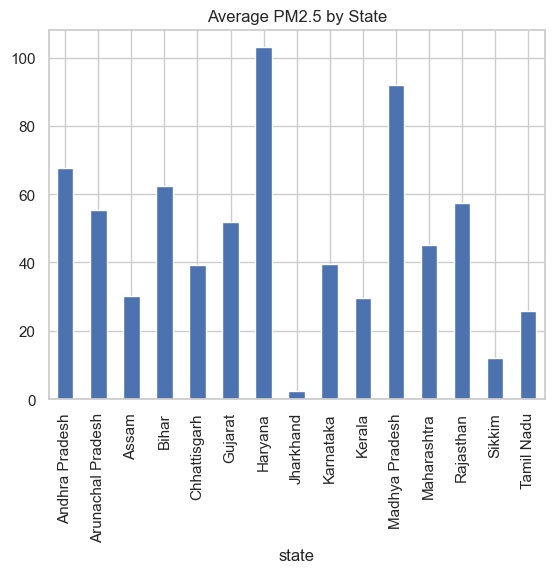

In [34]:
df.groupby('state')['pm25'].mean().plot(
    kind='bar',
    title="Average PM2.5 by State"
)
plt.show()


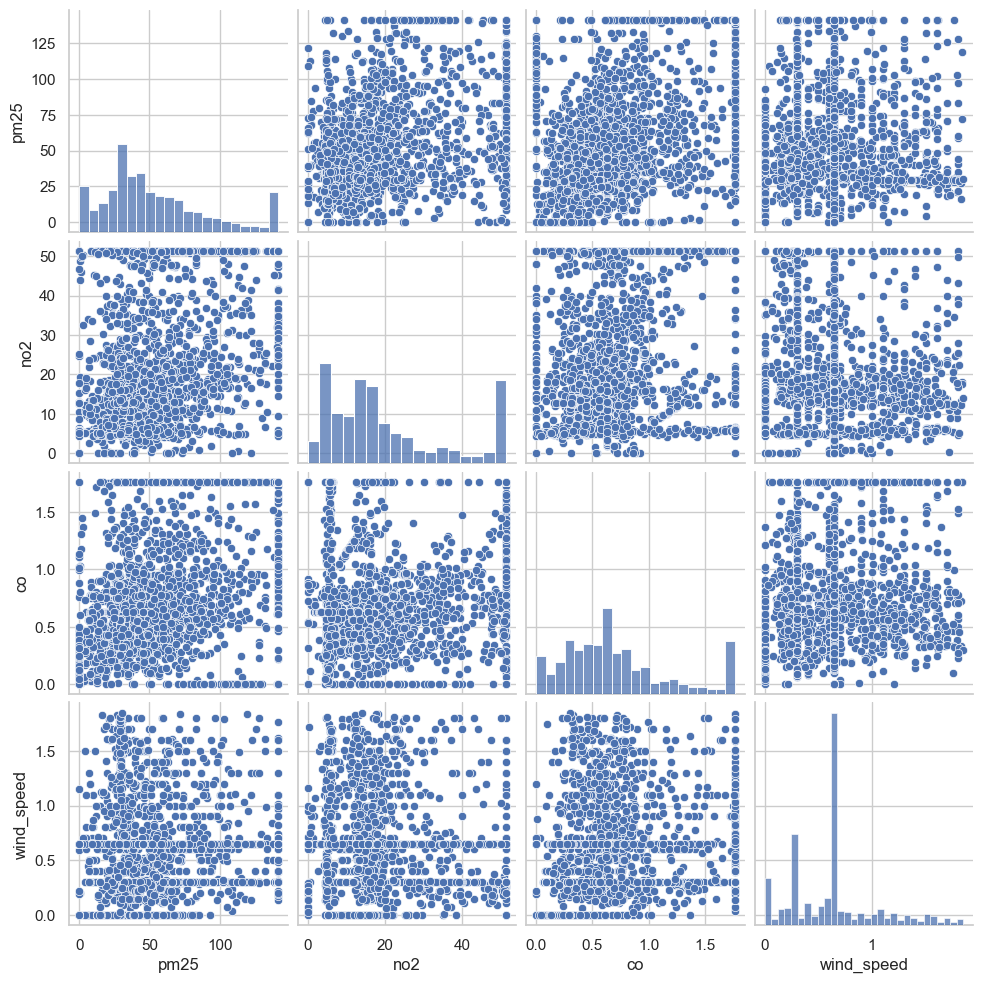

In [35]:
sample = df.sample(2000, random_state=42)

sns.pairplot(
    sample[['pm25','no2','co','wind_speed']]
)
plt.show()


In [65]:
print(
    "Pairplot indicates skewed pollutant distributions and weak, non-linear relationships, justifying the use of Spearman correlation."
)


Pairplot indicates skewed pollutant distributions and weak, non-linear relationships, justifying the use of Spearman correlation.


In [66]:
import pandas as pd
import numpy as np

print("="*60)
print("FINAL EXPLORATORY DATA ANALYSIS (EDA) SUMMARY")
print("="*60)

# -------------------------------
# 1️⃣ Dataset Overview
# -------------------------------
print("\n📌 Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n📌 Time Coverage:")
print("Start:", df['datetime_local'].min())
print("End  :", df['datetime_local'].max())

# -------------------------------
# 2️⃣ Missing Values Summary
# -------------------------------
print("\n📌 Remaining Missing Values (after cleaning):")
missing = df.isna().sum()
missing = missing[missing > 0]

if missing.empty:
    print("No missing values remaining.")
else:
    print(missing)

# -------------------------------
# 3️⃣ Pollutant Statistics
# -------------------------------
pollutants = ['pm25','pm10','no2','co','so2','o3']

print("\n📌 Pollutant Summary Statistics:")
print(df[pollutants].describe())

# -------------------------------
# 4️⃣ Weather Feature Summary
# -------------------------------
weather_features = ['temperature','humidity','wind_speed','wind_direction']

print("\n📌 Weather Feature Summary:")
print(df[weather_features].describe())

# -------------------------------
# 5️⃣ Distance Feature Insights
# -------------------------------
distance_features = [
    'dist_nearest_road_m',
    'dist_nearest_industry_m',
    'dist_nearest_dump_m',
    'dist_nearest_agriculture_m'
]

print("\n📌 Distance Feature Summary:")
for col in distance_features:
    print(f"\n{col}")
    print(df[col].describe())
    print("Unique values:", df[col].nunique())

# -------------------------------
# 6️⃣ Binary Source Indicators
# -------------------------------
binary_features = ['near_dump','near_agriculture']

print("\n📌 Binary Source Indicators:")
for col in binary_features:
    print(f"\n{col}")
    print(df[col].value_counts())

# -------------------------------
# 7️⃣ Correlation Insight (Spearman)
# -------------------------------
corr_features = [
    'pm25','pm10','no2',
    'dist_nearest_road_m',
    'dist_nearest_industry_m',
    'near_dump','near_agriculture'
]

corr_matrix = df[corr_features].corr(method='spearman')

print("\n📌 Spearman Correlation (Pollution vs Sources):")
print(corr_matrix[['pm25','pm10','no2']])

# -------------------------------
# 8️⃣ EDA Conclusion (Auto-generated)
# -------------------------------
print("\n📌 EDA CONCLUSION:")
print("""
• PM2.5, PM10, and NO2 show spatial dependence on proximity to roads and industries,
  indicating vehicular and industrial pollution influence.
• Distance to dumpsites and agricultural areas is constant across locations,
  suggesting absence of nearby sources; binary indicators are more appropriate.
• Weather variables show sufficient variability and are suitable for modeling.
• Dataset is clean, consistent, and suitable for source prediction modeling
  and geospatial analysis.
""")

print("="*60)
print("EDA COMPLETED SUCCESSFULLY ✅")
print("="*60)


FINAL EXPLORATORY DATA ANALYSIS (EDA) SUMMARY

📌 Dataset Shape:
Rows: 77994, Columns: 60

📌 Time Coverage:
Start: 2025-11-11 20:30:00
End  : 2025-12-11 19:45:00

📌 Remaining Missing Values (after cleaning):
No missing values remaining.

📌 Pollutant Summary Statistics:
               pm25          pm10           no2            co           so2  \
count  77994.000000  77994.000000  77994.000000  77994.000000  77994.000000   
mean      54.489701    105.033301     20.220679      0.724024     13.615768   
std       38.069747     68.380463     15.360847      0.478684     11.043557   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       29.000000     57.312500      8.571250      0.390000      5.300000   
50%       45.100000     86.127586     15.700000      0.630000     10.620000   
75%       74.000000    141.000000     25.700000      0.940000     18.980000   
max      141.500000    266.531250     51.393125      1.765000     39.500000   

                 o3

In [69]:
df.to_csv("Final_clean_dataset.csv", index=False)


In [1]:
import pandas as pd
df=pd.read_csv("Final_clean_dataset.csv")
df.head()

,state,district,location_id,location_name,datetime_utc,latitude,longitude,pm25,pm10,no2,...,co_scaled,so2_scaled,o3_scaled,temperature_scaled,humidity_scaled,wind_speed_scaled,wind_direction_scaled,datetime_local,near_dump,near_agriculture
0,Haryana,Faridabad,17,"R K Puram, Delhi - DPCC",2025-11-11 15:00:00+00:00,28.563262,77.186937,141.50,266.53125,51.393125,...,1.255464,0.738325,-0.005949,-0.229326,0.256680,-0.199909,0.894188,2025-11-11 20:30:00,0,0
1,Andhra Pradesh,Vijayawada,5408,"Secretariat, Amaravati - APPCB",2025-11-11 15:00:00+00:00,16.515083,80.518167,56.00,169.00000,43.200000,...,-0.038239,-0.419886,-0.005949,0.256974,0.417283,-0.177697,-1.331553,2025-11-11 20:30:00,0,0
2,Gujarat,Surat,3409371,"Science Center, Surat - SMC",2025-11-11 15:00:00+00:00,21.170046,72.795405,67.27,90.80000,6.480000,...,0.001364,0.353337,-0.005949,0.492559,-0.150848,-0.153263,1.308387,2025-11-11 20:30:00,0,0
3,Chhattisgarh,Durg,3409367,"Hathkhoj, Bhilai - CECB",2025-11-11 15:00:00+00:00,21.224231,81.408350,55.38,136.86000,51.393125,...,-0.183451,-0.112473,-0.005949,-0.503815,-0.042040,-0.209350,-1.312793,2025-11-11 20:30:00,0,0
4,Jharkhand,Dhanbad,5546,Tata Stadium - Jorapokhar - JSPCB,2025-11-11 15:00:00+00:00,23.707909,86.414670,0.00,0.00000,0.000000,...,-1.041519,-0.567820,-0.005949,-2.206944,-2.433409,-0.182139,0.018094,2025-11-11 20:30:00,0,0
